# Importing the necessary libraries 

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

# Reading the data for the Toronto city

In [228]:
df=pd.read_csv("toronto.csv")

#df[['Date','Time']] = df.Date.str.split(expand=True) #Dividing the date column into two seperate columns date and time using split function
df.head()



Date  AQI      CO     NO    NO2    O3    SO2  PM2_5   PM10  \
0  2020-11-26 23:00:00    2  507.36  10.39  47.98  0.39  14.19   8.20  13.79   
1  2020-11-27 00:00:00    2  460.63   6.04  42.50  0.85  11.33   8.31  12.33   
2  2020-11-27 01:00:00    1  420.57   3.05  36.33  1.99   9.78   8.88  11.82   
3  2020-11-27 02:00:00    1  383.85   1.44  31.87  4.65   9.42   9.70  12.32   
4  2020-11-27 03:00:00    2  357.15   0.80  29.13  7.78   9.66  10.09  12.62   

    NH3  
0  1.88  
1  1.39  
2  1.14  
3  1.01  
4  0.90

# Computing the missing values in the dataset

In [229]:
df.isnull().sum()

Date     0
AQI      0
CO       0
NO       0
NO2      0
O3       0
SO2      0
PM2_5    0
PM10     0
NH3      0
dtype: int64

# Determing the shape of a dataset

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15312 non-null  object 
 1   AQI     15312 non-null  int64  
 2   CO      15312 non-null  float64
 3   NO      15312 non-null  float64
 4   NO2     15312 non-null  float64
 5   O3      15312 non-null  float64
 6   SO2     15312 non-null  float64
 7   PM2_5   15312 non-null  float64
 8   PM10    15312 non-null  float64
 9   NH3     15312 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.2+ MB


In [231]:
df.shape

(15312, 10)

# Describing the dataset to get the min,max,mean values


In [232]:
df.describe()

AQI            CO            NO           NO2            O3  \
count  15312.000000  15312.000000  15312.000000  15312.000000  15312.000000   
mean       1.627678    375.162909      4.278530     24.845260     55.100829   
std        0.851773    167.318281     12.836563     18.274484     33.851304   
min        1.000000    160.220000      0.000000      2.420000      0.000000   
25%        1.000000    283.720000      0.010000     12.170000     33.620000   
50%        1.000000    330.450000      0.310000     19.190000     53.640000   
75%        2.000000    407.220000      2.650000     31.530000     71.530000   
max        5.000000   2830.510000    300.410000    183.700000    303.270000   

                SO2         PM2_5          PM10           NH3  
count  15312.000000  15312.000000  15312.000000  15312.000000  
mean      11.396721      8.667347     12.244318      2.275220  
std        8.137922      8.619171     11.502455      2.067019  
min        1.090000      0.500000      0.680000      0.000000  
25%        6.260000      2.660000      4.370000      1.010000  
50%        8.940000      6.020000      8.800000      1.680000  
75%       13.710000     11.590000     16.012500      2.820000  
max       99.180000     90.640000    112.500000     25.590000

# Dropping the date column 

In [233]:
df.drop(['Date'],axis=1,inplace=True)#Dropping date column as it is not significant for modeling purpose
df.head()


AQI      CO     NO    NO2    O3    SO2  PM2_5   PM10   NH3
0    2  507.36  10.39  47.98  0.39  14.19   8.20  13.79  1.88
1    2  460.63   6.04  42.50  0.85  11.33   8.31  12.33  1.39
2    1  420.57   3.05  36.33  1.99   9.78   8.88  11.82  1.14
3    1  383.85   1.44  31.87  4.65   9.42   9.70  12.32  1.01
4    2  357.15   0.80  29.13  7.78   9.66  10.09  12.62  0.90

# Creating the box plots of various components to visualize the outliers

<AxesSubplot: xlabel='PM10'>

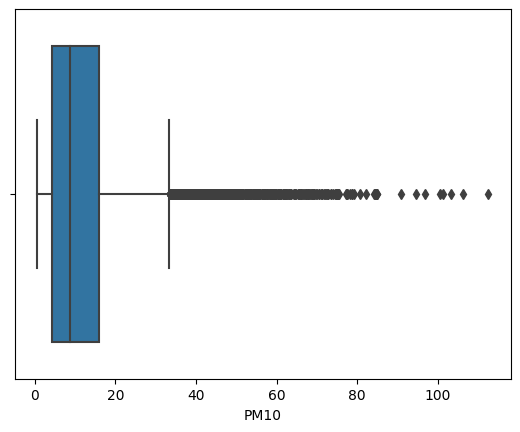

In [253]:
 sns.boxplot(x=df['PM10'])

<AxesSubplot: xlabel='CO'>

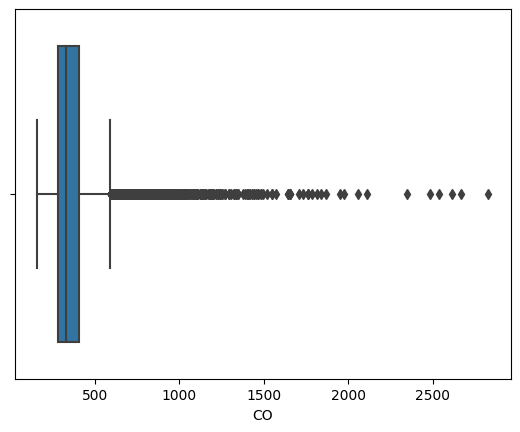

In [254]:
 sns.boxplot(x=df['CO'])

<AxesSubplot: xlabel='NO'>

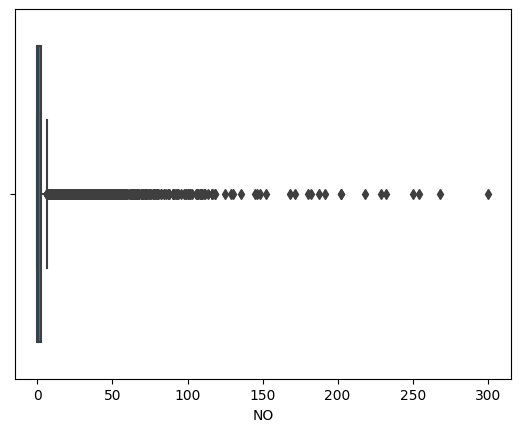

In [255]:
 sns.boxplot(x=df['NO'])

<AxesSubplot: xlabel='NO2'>

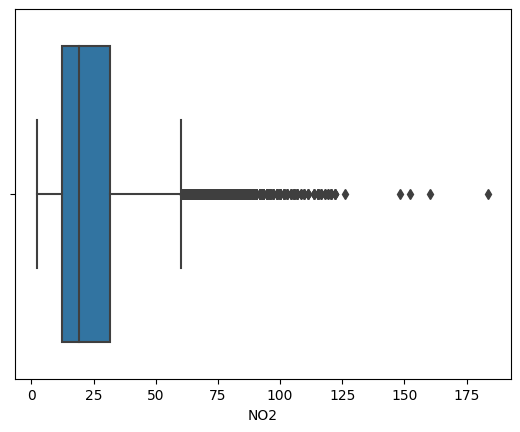

In [256]:
 sns.boxplot(x=df['NO2'])

<AxesSubplot: xlabel='O3'>

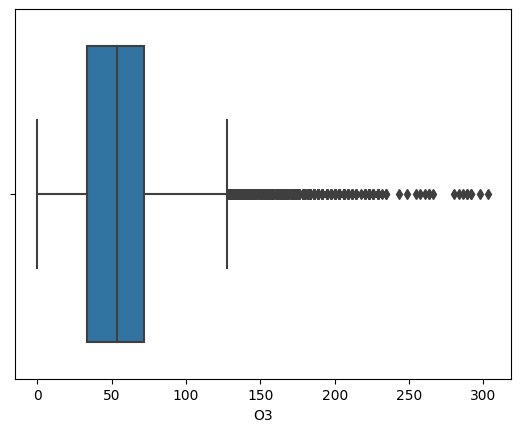

In [257]:
 sns.boxplot(x=df['O3'])

<AxesSubplot: xlabel='SO2'>

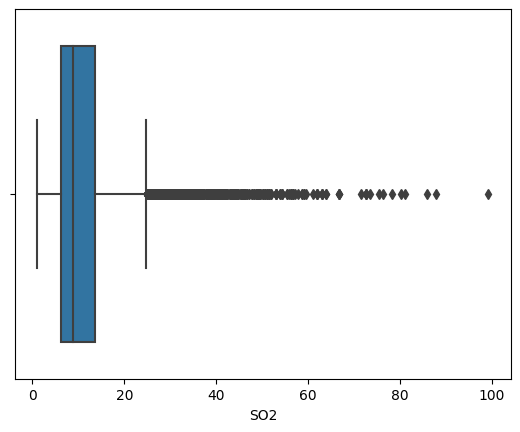

In [258]:
 sns.boxplot(x=df['SO2'])

<AxesSubplot: xlabel='NH3'>

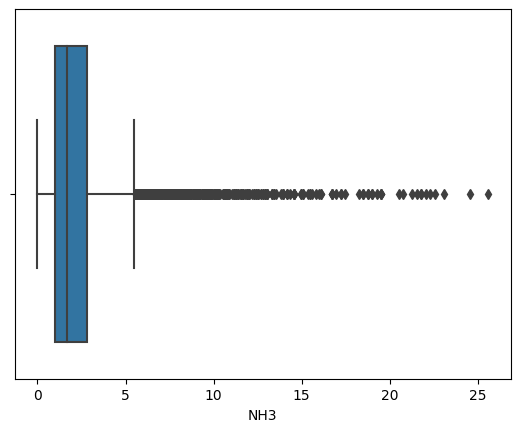

In [259]:
 sns.boxplot(x=df['NH3'])

<AxesSubplot: xlabel='PM2_5'>

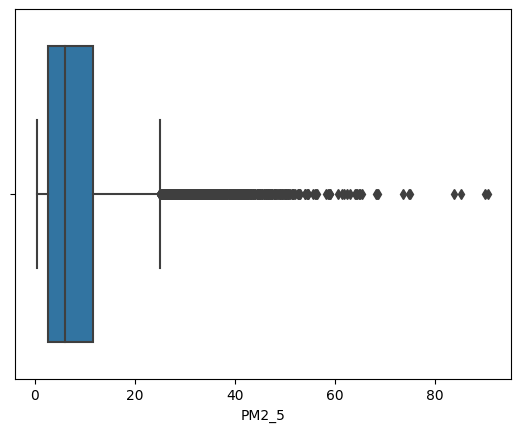

In [260]:
 sns.boxplot(x=df['PM2_5'])

<AxesSubplot: xlabel='PM2_5'>

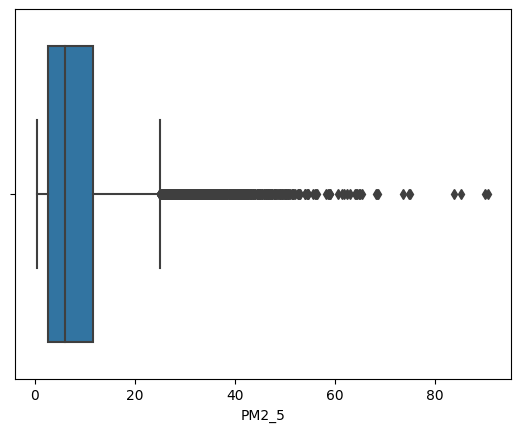

In [261]:
 sns.boxplot(x=df['PM2_5'])

# Dropping the AQI column to start with modelling

In [243]:
X=df.drop(['AQI'],axis=1)#independent variables
y=df['AQI']#dependent variable
print(X.shape)
print(y.shape)
type(X)

(15312, 8)
(15312,)


pandas.core.frame.DataFrame

Converting the dependent variable to array 

In [244]:
y = np.array(y).reshape(-1,1)# reshape is done to make the input n output dimension same
y.shape

(15312, 1)

# Splitting the data for training and testing using sklearn

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [246]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [247]:
X_train.iloc[1,:]

CO       253.68
NO         0.00
NO2        7.54
O3        77.96
SO2        4.23
PM2_5      2.10
PM10       3.69
NH3        1.52
Name: 1562, dtype: float64

As our data set is related to multiclass classification, we have used **Support Vector Classification**  to train the model 

In [248]:
from sklearn.svm import SVC
SVRmodel=SVC()
SVRmodel.fit(X_train,y_train)



SVC()

**Now we are doing the prediction for the test data**

In [249]:
ypred=SVRmodel.predict(X_test)

**Checking the accuracy of the model**

In [250]:
accuracy_score(ypred,y_test)

0.8442703232125367

**Testing the AQI for one of the training dataset row values**

In [251]:
i = np.array([507.36,10.39,47.98,0.39,14.19,8.20,13.79,1.88])
i = i.reshape(1,-1)
i.shape

(1, 8)

**Obtaining the result same as given in the training data set**

In [252]:
SVRmodel.predict(i)

array([2], dtype=int64)